# Univariate, Missing Values and Outliers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# load data and get some insight
pdata = pd.read_csv("bank-full.csv")
pdata.head()


age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

In [3]:
unique_values = pdata.nunique()
print('Count unique values in each column')
print(unique_values)

Count unique values in each column
age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64


In [4]:
pdata.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [5]:
# check for null value
pdata.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

*Base on the sumarize above, we do not see we have any bad or missing data.*

In [6]:
pdata.shape

(45211, 17)

In [26]:
pdata['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

In [7]:
# Categorical Data
# job, marital, default, education, housing, loan, contact, poutcome

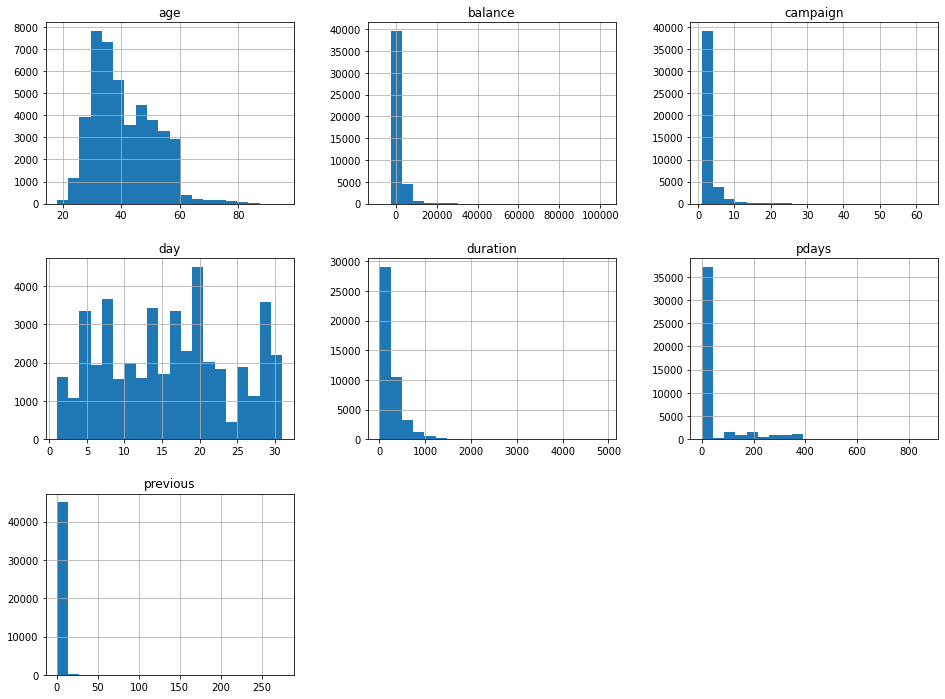

In [8]:
pdata.hist(bins=20, figsize=(16,12))
plt.show()

*Base on the info above, we can see we have long tails (campaign) and outlier (duration)*

In [94]:
def countplot(label, using_hue=False):
    plt.figure(figsize=(15,5))
    total = len(pdata[label])
    
    if using_hue:
        ax = sns.countplot(x=label, data=pdata, hue='Target')
    else:
        ax = sns.countplot(x=label, data=pdata)
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100 * p.get_height()/total), (p.get_x() + 0.1, p.get_height() + 5))
    ax.yaxis.set_ticks(np.linspace(0, total, 11))
    ax.set_yticklabels(map('{:.1f}%'.format, 100 * ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    plt.show()

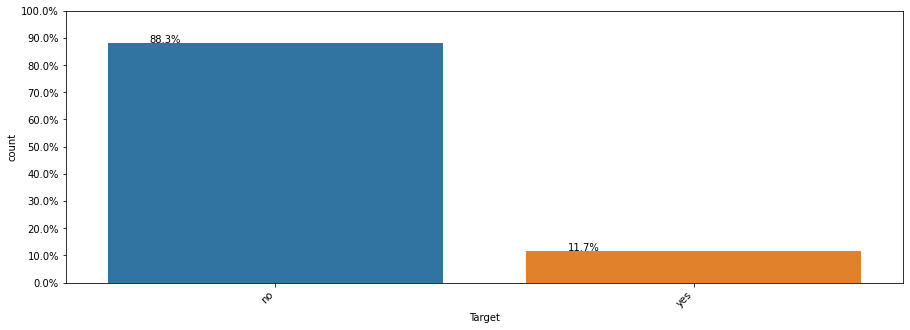

In [119]:
countplot('Target')

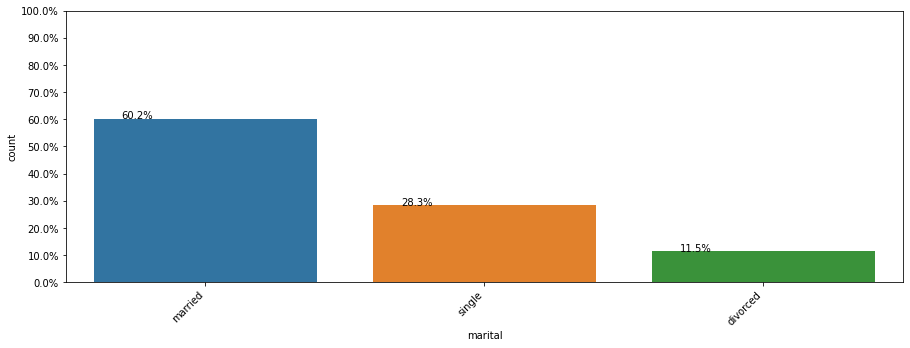

In [95]:
# Count by marital
countplot("marital")

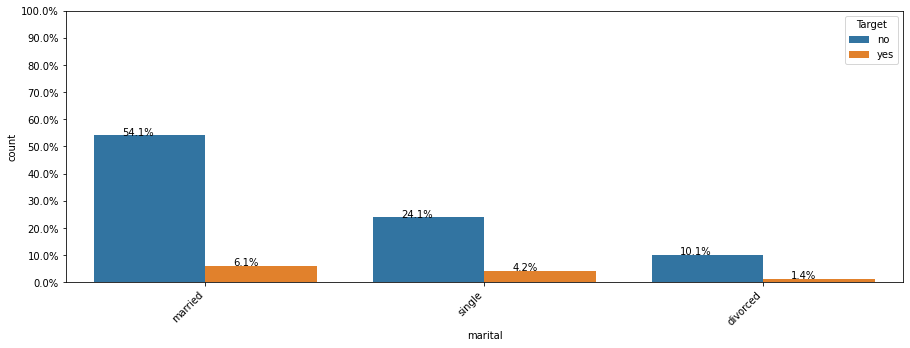

In [96]:
# included target so we can see how marital might impact Target
countplot("marital", True)

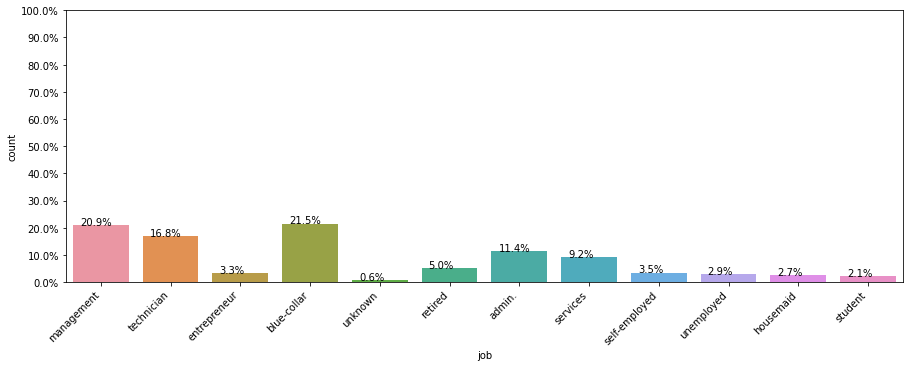

In [97]:
# Count by job
countplot("job")

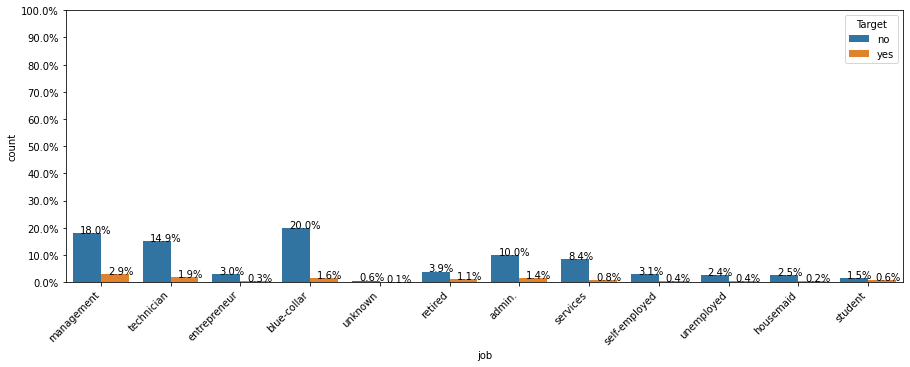

In [108]:
# included target so we can see how job might impact Target
countplot('job', True)

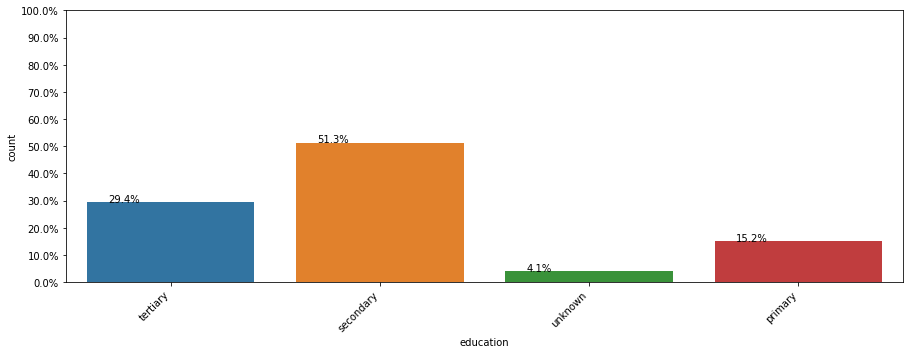

In [100]:
countplot("education")

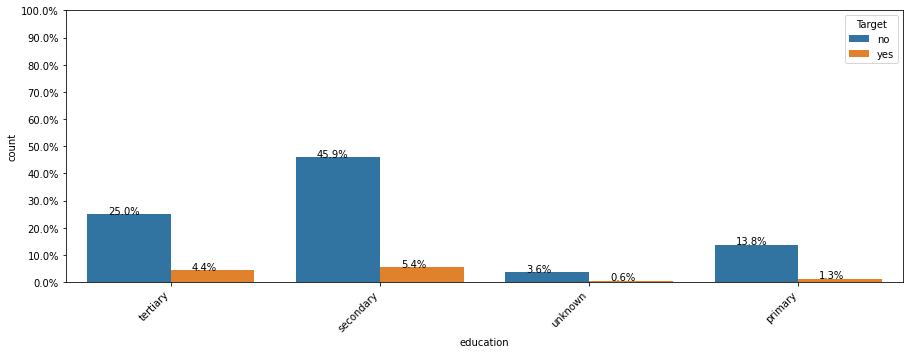

In [110]:
# included target so we can see how education might impact Target
countplot("education", True)

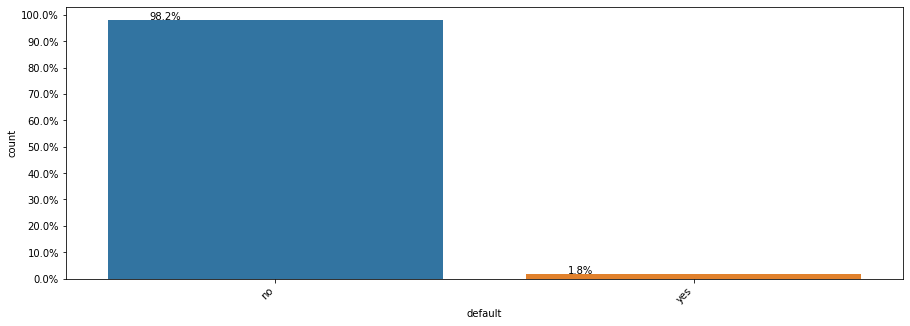

In [102]:
countplot('default')

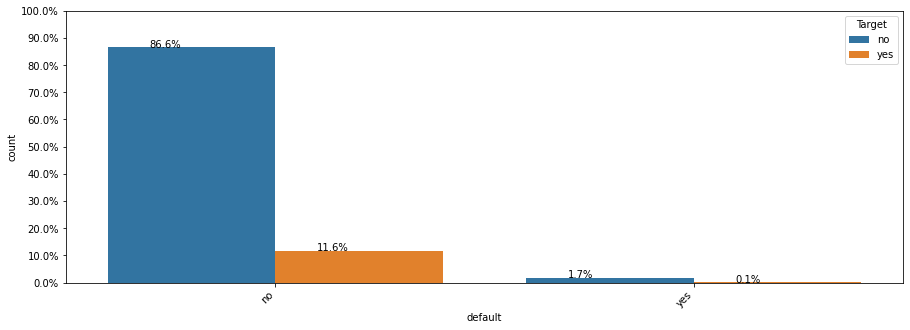

In [111]:
# included target so we can see how default might impact Target
countplot('default', True)

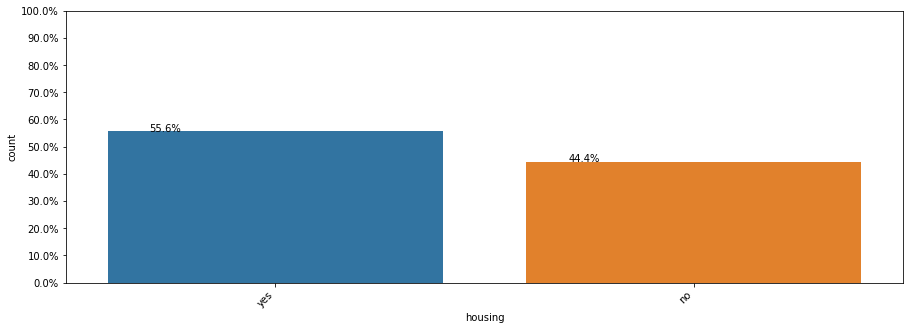

In [104]:
countplot('housing')

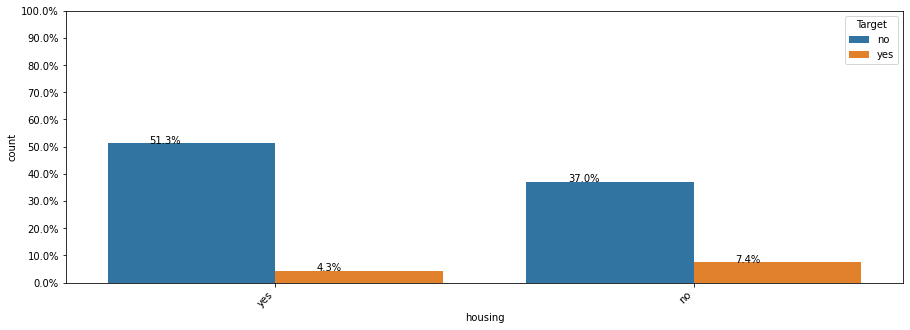

In [112]:
# included target so we can see how housing might impact Target
countplot('housing', True)

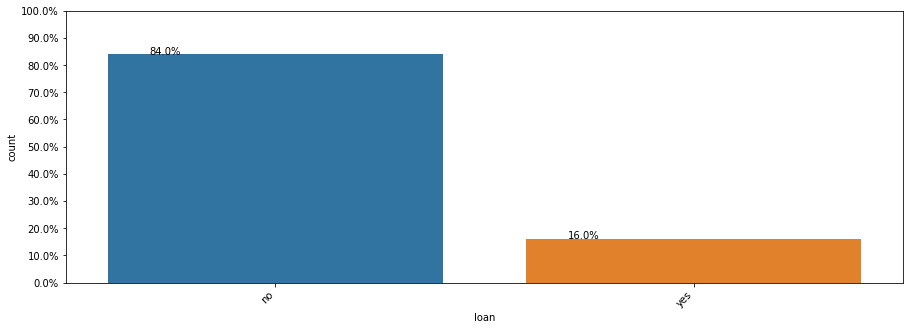

In [113]:
countplot('loan')

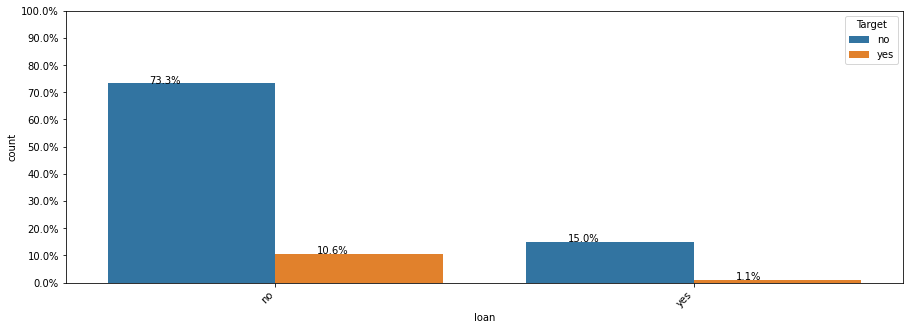

In [114]:
countplot('loan', True)

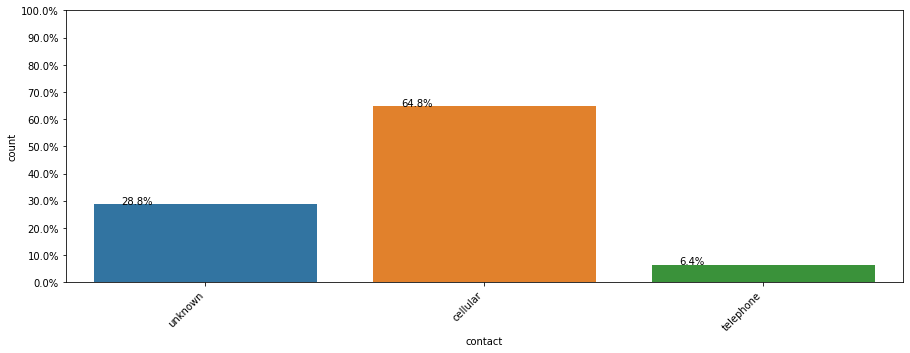

In [115]:
countplot('contact')

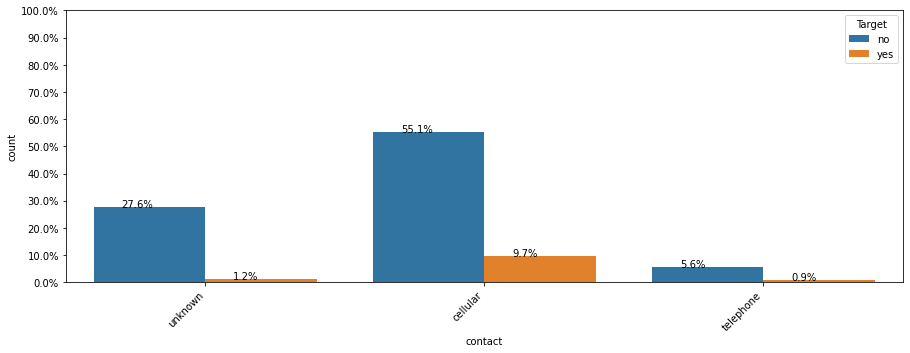

In [116]:
countplot('contact', True)

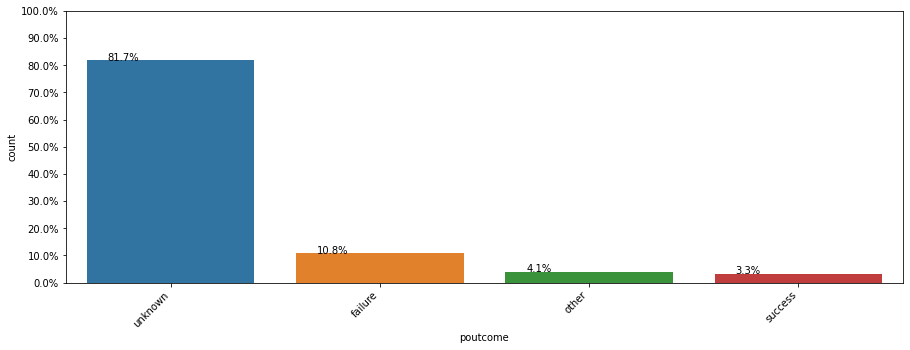

In [117]:
countplot('poutcome')

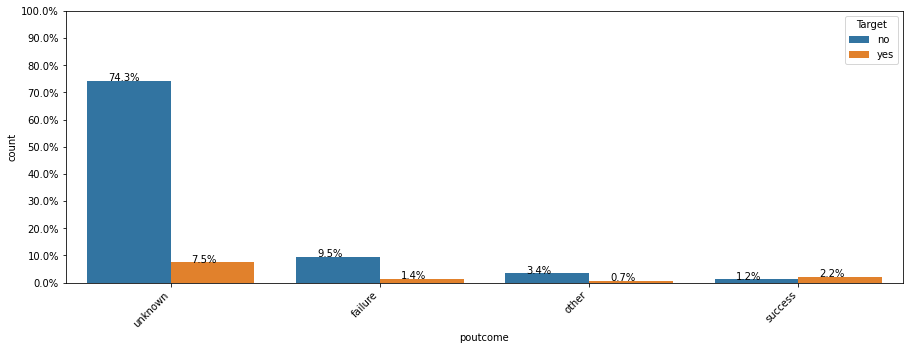

In [118]:
countplot('poutcome', True)

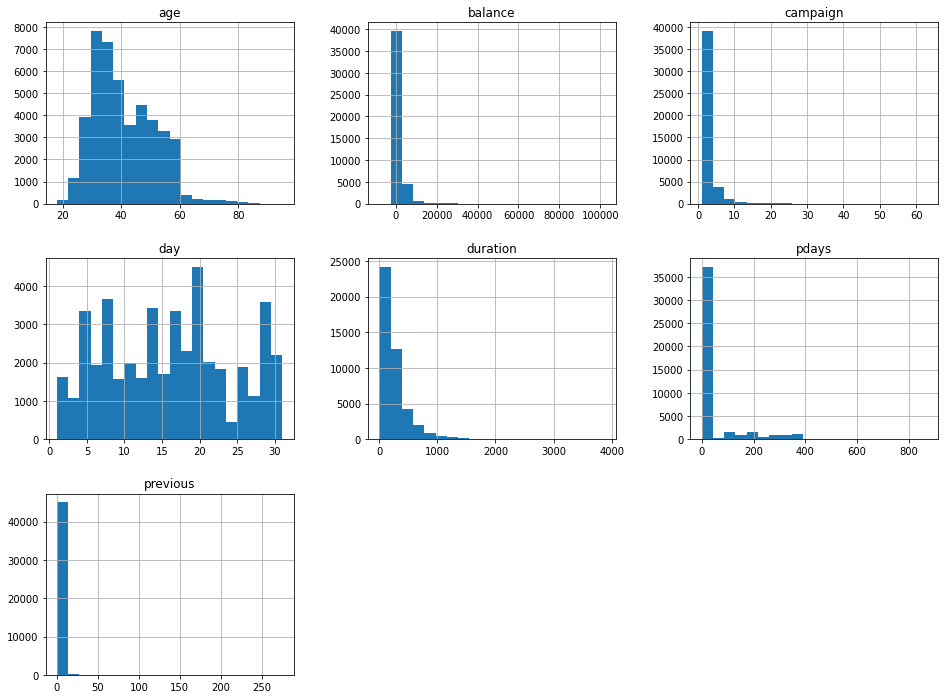

In [14]:
# Filter pdata by pdata where duration is less than 4000 to reduce outliner issue
pdata_filtered = pdata.loc[pdata['duration'] < 4000]
pdata_filtered.hist(bins=20, figsize=(16,12))
plt.show()

# Bivariate

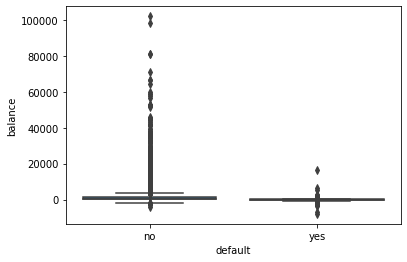

In [15]:
sns.boxplot(x='default', y='balance', data=pdata)

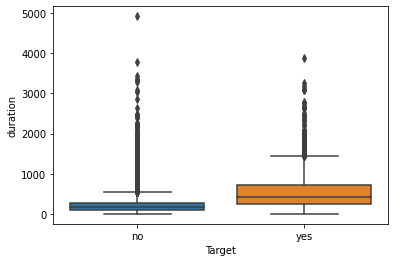

In [16]:
sns.boxplot(x='Target', y='duration', data=pdata)

[Text(0, 0, 'management'),
 Text(0, 0, 'technician'),
 Text(0, 0, 'entrepreneur'),
 Text(0, 0, 'blue-collar'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'retired'),
 Text(0, 0, 'admin.'),
 Text(0, 0, 'services'),
 Text(0, 0, 'self-employed'),
 Text(0, 0, 'unemployed'),
 Text(0, 0, 'housemaid'),
 Text(0, 0, 'student')]

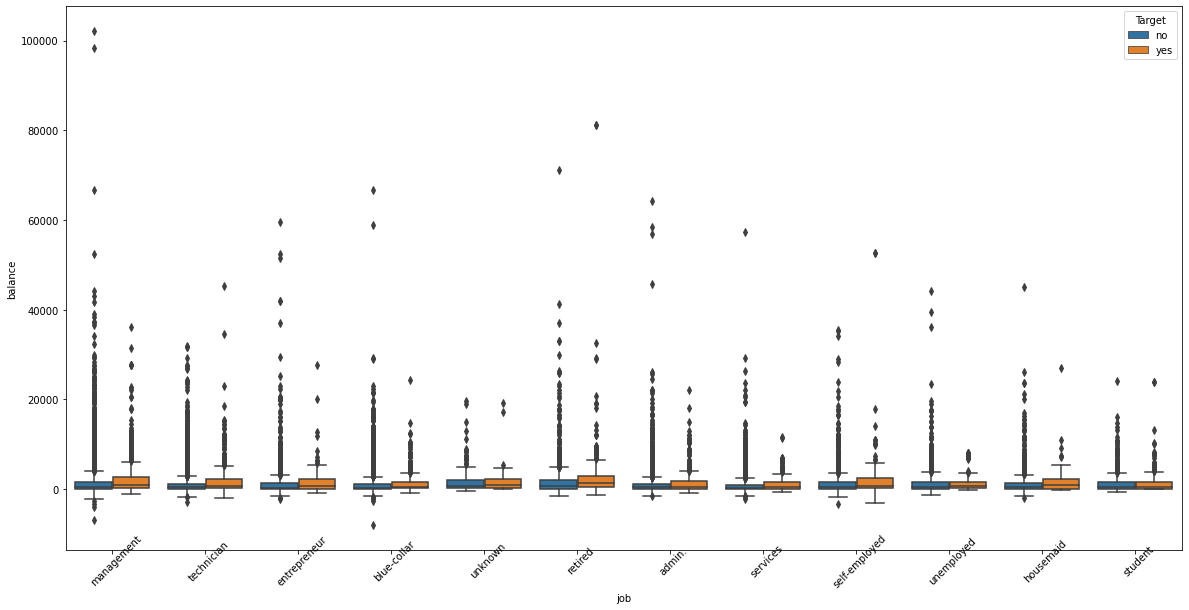

In [17]:
fig = plt.figure(figsize=(20,10))
fig1 = sns.boxplot(x="job", y="balance", hue="Target", data=pdata)
fig1.set_xticklabels(pdata["job"].unique(), rotation=45, rotation_mode="anchor")


[Text(0, 0, 'management'),
 Text(0, 0, 'technician'),
 Text(0, 0, 'entrepreneur'),
 Text(0, 0, 'blue-collar')]

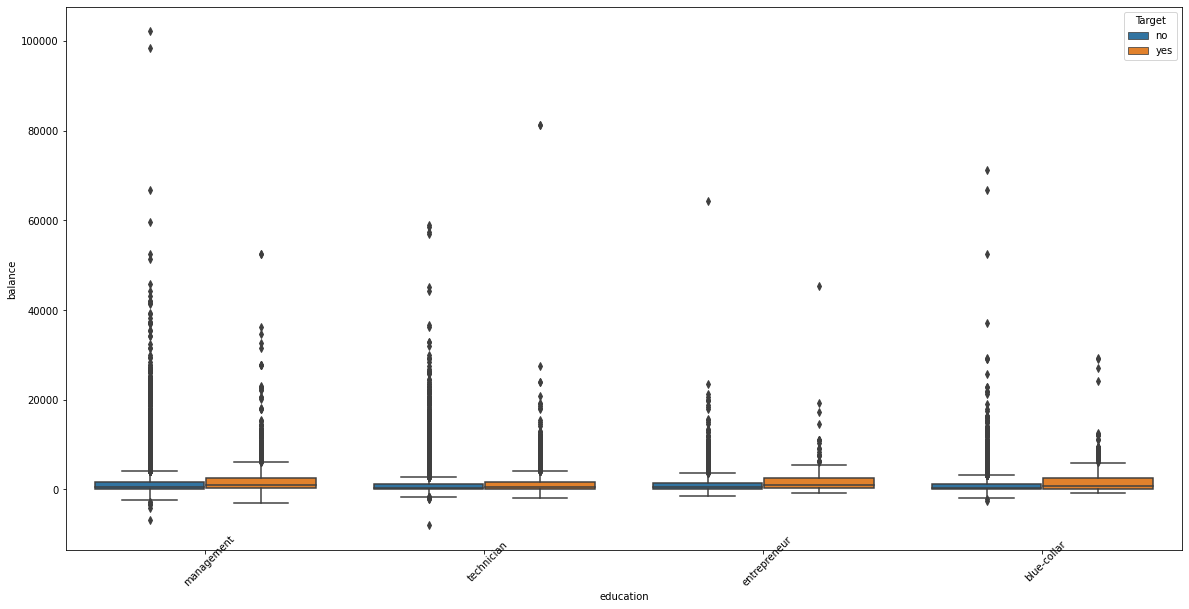

In [19]:
fig = plt.figure(figsize=(20,10))
fig2 = sns.boxplot(x="education", y="balance", hue="Target", data=pdata)
fig2.set_xticklabels(pdata["job"].unique(), rotation=45, rotation_mode="anchor")


[Text(0, 0, 'management'),
 Text(0, 0, 'technician'),
 Text(0, 0, 'entrepreneur'),
 Text(0, 0, 'blue-collar'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'retired'),
 Text(0, 0, 'admin.'),
 Text(0, 0, 'services'),
 Text(0, 0, 'self-employed'),
 Text(0, 0, 'unemployed'),
 Text(0, 0, 'housemaid'),
 Text(0, 0, 'student')]

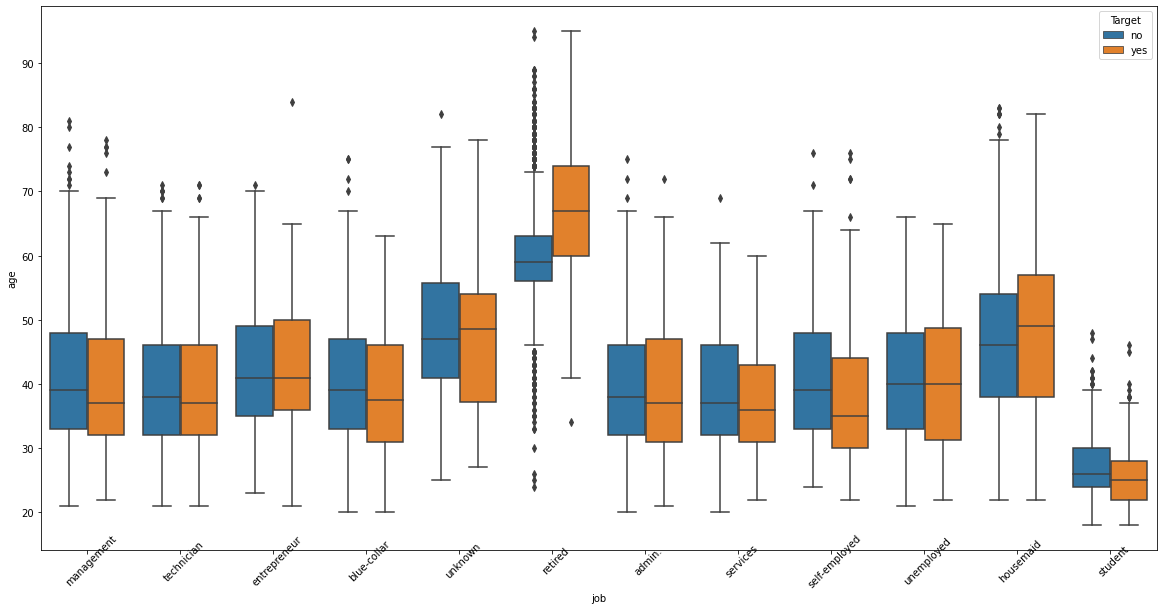

In [27]:
fig = plt.figure(figsize=(20,10))
fig3 = sns.boxplot(x="job", y="age", hue="Target", data=pdata)
fig3.set_xticklabels(pdata["job"].unique(), rotation=45, rotation_mode="anchor")

[Text(0, 0, 'married'), Text(0, 0, 'single'), Text(0, 0, 'divorced')]

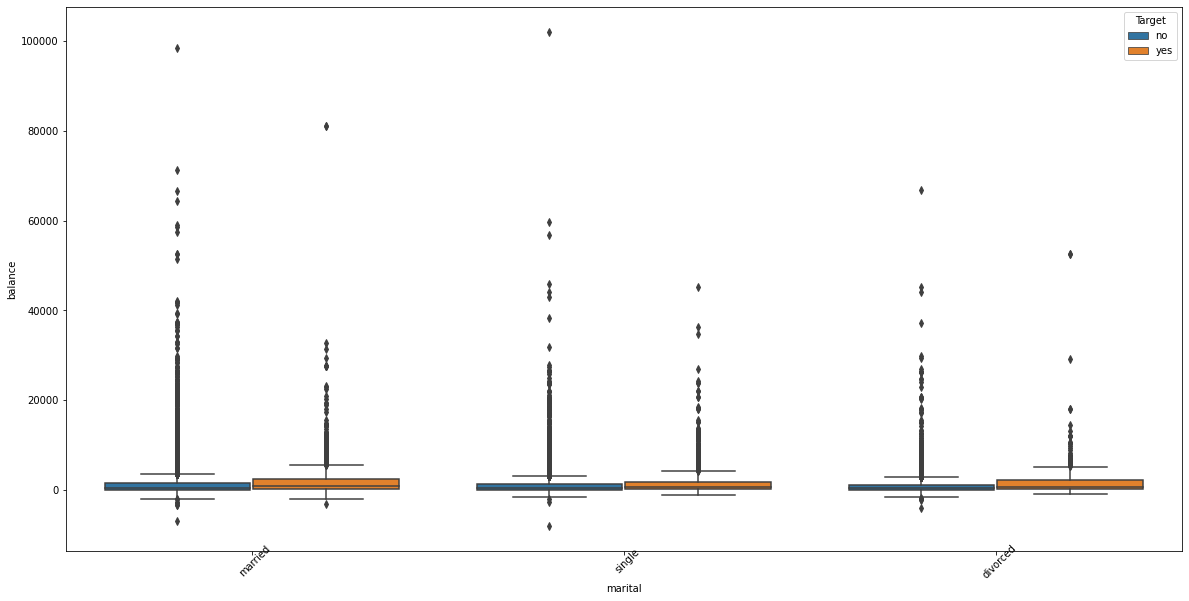

In [30]:
fig = plt.figure(figsize=(20,10))
fig4 = sns.boxplot(x="marital", y="balance", hue="Target", data=pdata)
fig4.set_xticklabels(pdata["marital"].unique(), rotation=45, rotation_mode="anchor")

# Prepare Data for analysis	

# Log Reg & Decision Tree

# Ensemble Model (3 atleast)	

# Conclusion